In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [30]:
df = pd.read_csv("house_data.csv", index_col=0)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


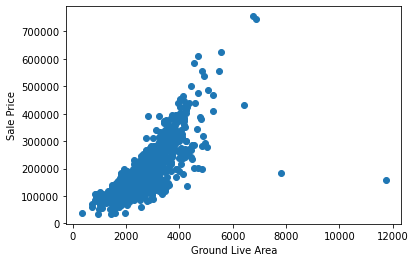

In [31]:
x = df["GrLivArea"] + df["TotalBsmtSF"]
y = df["SalePrice"]

plt.figure()

plt.scatter(x, y)
plt.ylabel("Sale Price")
plt.xlabel("Ground Live Area")

plt.show()

In [32]:
## Let's quantify this relationship with correlation
r, pval = stats.pearsonr(x, y)

print("r:", r)

r: 0.7789588289942257


## Intro to Regression
* Recall that when the class arttribute is numeric, it is a regression task
* There are lots of regression algorithms (see scikit learn docs)
    * Linear regression (simple and multiple)
        * simple: only one regressional model, i.e. x
    * kNN regressor
    * Decision tree regressor
    * Support vector regressor
    * etc.

## Goal
* We want to fit a line to the square footage/sales price data so we can use it to make predictions for "unseen" houses (e.g. like Zestimate on Zillow, or home appraisal)
* We will focus on simple linear regression now (multiple for DA7)
    * Recall: $y = mx + b$
        * m: slope
        * b: intercept
    * If we can find m and b, we have a linear model for making prediction with

In [33]:
# split our dataset into training and testing
from sklearn.model_selection import train_test_split

# Let's hold out 10 instances for testing
X = x.to_frame() # convert 1D series to 2D dataframe (with one column)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression

lin_req = LinearRegression()
lin_req.fit(X_train, y_train)
print("coefficients:", lin_req.coef_)

m = lin_req.coef_[0]
b = lin_req.intercept_
print("m:", m, "b:", b)

coefficients: [74.27764418]
m: 74.27764417996414 b: -10222.105716558202


In [35]:
# let's make a prediction for the first unseen instance in our test set
# do it manually
x_unseen = X_test.iloc[0, 0]
y_unseen = y_test.iloc[0]
y_pred = m * x_unseen + b
print("predicted:", y_pred, "actual:", y_unseen, "error (residual):", y_unseen - y_pred)

predicted: 327741.1753022786 actual: 200624 error (residual): -127117.1753022786


In [36]:
# task: try using the residuals for all 10 instances in our test set
# using predict()
y_pred = lin_req.predict(X_test)
print(y_pred)

residuals = y_test - y_pred
print(residuals)
mae = residuals.abs().mean()
print(mae) # we are off by around 71k, can we do better?

[327741.17530228 166855.79800848 131796.74995553 226129.35806409
 109884.84492244 141601.39898729 208822.66697016 149846.21749126
 500213.86508816 112558.84011292]
Id
530    -127117.175302
492     -33855.798008
460     -21796.749956
280     -34129.358064
656     -21884.844922
1014    -56601.398987
1404     74099.333030
602      -8846.217491
1183    244786.134912
688      36241.159887
Name: SalePrice, dtype: float64
65935.81705601388


## Regression Evaluation Metrics
The goal is to quantify the relationship between variables (e.g. x and y, y_test and y_pred, etc.)
* There are several metrics:
    * MAE
    * Correlation:
        * $r$ in the range `[-1.0, 1.0]`
        * 1.0: perfect linear relationship between x and y (as x increases, y increases; as x decreases, y decreases)
        * -1.0: perfect inverse relationship between x and y (as x increases, y decreases; as x decreases, y increases)
        * at or near 0.0: there is no (linear) relationship between x and y (they are linearly independent). Can also be other kind of relationship
    * Coefficient of determination
        * $R^2$ in the range `[0.0, 1.0]`
        * Proportion of variation in y that is explained by x
        * The $R^2$, the stronger relationship between x and y
        * This is the default scoring metric for regression in scikit learn

In [37]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2:", r2)
r2 = lin_req.score(X_test, y_test)
print("R2:", r2)

# 74% of the variation in y_pred is explained by y_test
# The other 26% is the error (unexplained)

R2: 0.7421494041564433
R2: 0.7421494041564433
